**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
pd.set_option('max_colwidth', 2000)

**Importing the dataset**

In [3]:
dataset = pd.read_table('SMSSpamCollection', sep = "\t", names = ['SMS Type', 'Text'])

In [4]:
dataset.head()

,SMS Type,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


** Text Cleaning**

In [5]:
def cleaning_text(text):
    """
    The cleaning_text function takes a text and returns a clean text with no punctuation
    and composed only of the roots of every word that is not a stopword in the English language
    
    @param text is the text that you want the cleaning_function to be applied to
    """
    import re 
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer

    # creating an object from the class PorterStemmer
    ps = PorterStemmer()

    # remove any punctuation from the text and replace with space
    clean_text = re.sub("[^a-zA-Z]"," ", text)

    # change all letters to lowercase
    clean_text = clean_text.lower()

    # create a list of words from the text message
    clean_text = clean_text.split()

    # check if each word is a stopword and if not keep only its root
    clean_text = [ps.stem(word) for word in clean_text if word not in set(stopwords.words('english'))]

    # convert that list of words into a string with space as the delimeter, in order to create a bag of words in the future
    clean_text = " ".join(clean_text)

    return clean_text

In [6]:
# Getting the number of texts in the dataset 
num_texts = dataset.shape[0]
num_texts

5572

**Creating the corpus**

In [7]:
corpus = [cleaning_text(each_text) for each_text in dataset['Text']]

In [8]:
# exploring the corpus
expl_corpus = pd.Series(corpus, name = "Text")
expl_corpus.head()

0                           go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1                                                                                  ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
3                                                                    u dun say earli hor u c alreadi say
4                                                                   nah think goe usf live around though
Name: Text, dtype: object

**Creating a bag of words**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# creating the bag of words matrix
X = cv.fit_transform(corpus).toarray()

In [10]:
# Finding the dimension of our bag of words
# we have 5572 text messages but these text messages are composed of 6296 differents words.
np.shape(X)

(5572, 6296)

In [11]:
# The matrix below shows that there are lot of words that almost never appear in most of the reviews.
# and this will create a sparse matrix, which is a problem for machine learning algorithm
# we will try to decrease the sparsity of our matrix X by remove those words.
# We can have an idea of those words by looking at the expl_corpus above. words like st, usf, and so on need to be removed
# additional expertise is necessary to do a good nlp problem
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# we go back and change the max_features to a lower number in the CountVectorizer object during object instantiation.
# This will get rid of words that appear rarely in text.  
cv = CountVectorizer(max_features = 6000) # our bag of words will have only the 6000 most frequent words as columns. from 6296
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Create dependent variable**

In [13]:
y = dataset['SMS Type']

In [14]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: SMS Type, Length: 5572, dtype: object

**Splitting the dataset into training set and testing set**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Fitting Naive Bayes to the training set**

In [16]:
from sklearn.naive_bayes import MultinomialNB # perform better than the previous (GaussianNB)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predicting the test result**

In [17]:
y_pred = classifier.predict(X_test)

**Making the confusion matrix**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

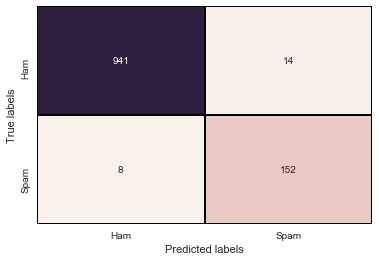

In [20]:
target_names = ['Ham','Spam']
sns.heatmap(cm, annot = True, fmt = "d",# fmt can be .2f
            square = False, linewidths = 1, linecolor = 'black',
           cbar = False, xticklabels = target_names, yticklabels = target_names) 
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

** Classification metrics**

In [24]:
print("The accuracy score for this model is: {:.3f}".format(sklearn.metrics.accuracy_score(y_test,y_pred)))

The accuracy score for this model is: 0.980


#### Additional metrics

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99       955
       spam       0.92      0.95      0.93       160

avg / total       0.98      0.98      0.98      1115

